<a href="https://colab.research.google.com/github/MRayhanAP/MRayhanAP-PCVK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


 mengubah tingkat kecerahan citra dengan transform log 
 -------------------------------- 
Masukan nilai kecerahan: 50


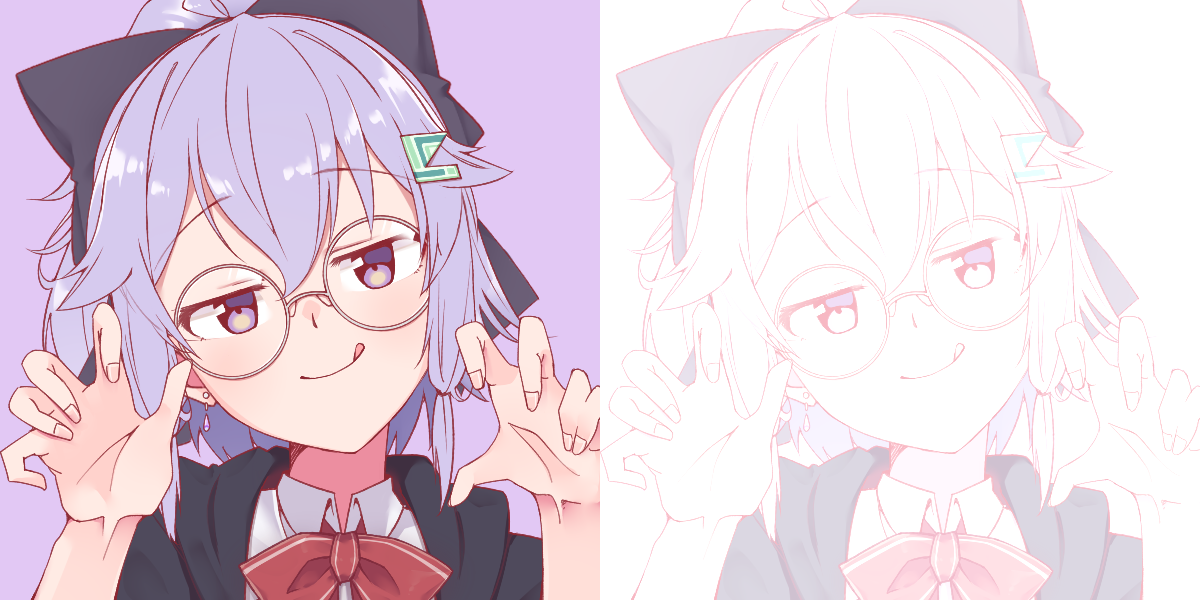

In [25]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(' mengubah tingkat kecerahan citra dengan transform log ')
print(' -------------------------------- ')

try:
  brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  print('Error, bukan angka')

original = image
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1.0+original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(cv.cvtColor(final_frame,cv.COLOR_BGR2RGB))

 Mengubah kontras dan tingkat kecerahan citra
---------------------------------
Masukkan tingkat kecerahan[-255 - 255]: 60
Masukkan kontras [1.0-3.0]: 1.5


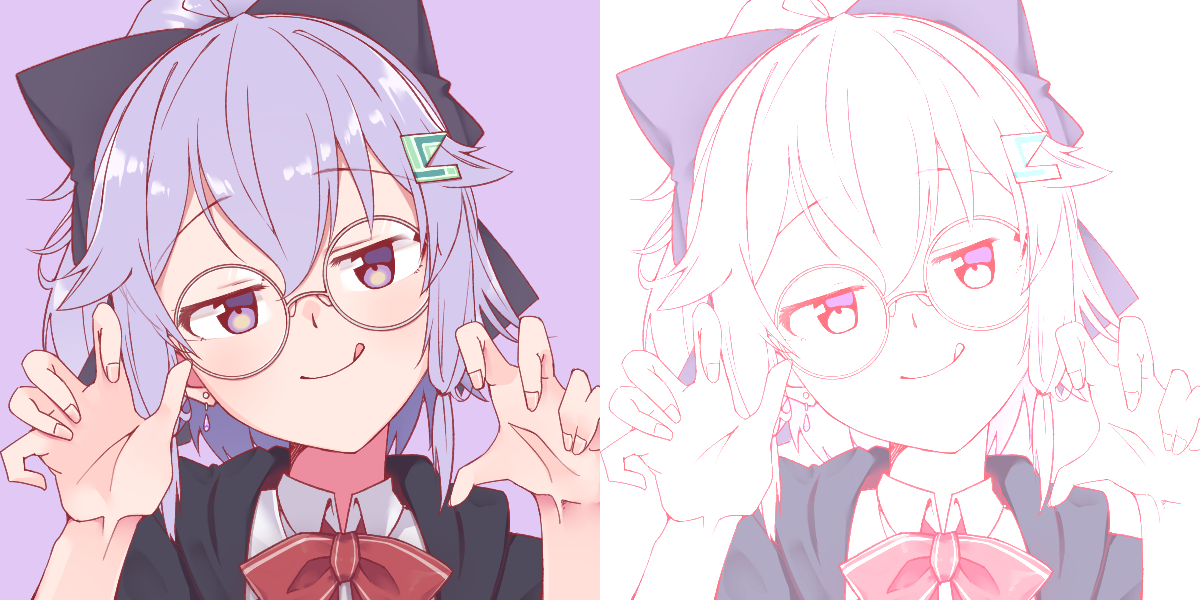

In [9]:
img2 = cv.imread('/content/drive/MyDrive/01kitten.png')
new_img1 = np.zeros(img2.shape, img2.dtype)

print(' Mengubah kontras dan tingkat kecerahan citra') 
print('---------------------------------') 
try: 
    brightness = int(input('Masukkan tingkat kecerahan[-255 - 255]: '))
    contrast = float(input('Masukkan kontras [1.0-3.0]: ')) 
except ValueError: 
    print('Error, not a number') 
 
for y in range(img2.shape[0]):
  for x in range(img2.shape[1]):
    for c in range(img2.shape[2]): 
            new_img1[y,x,c] = np.clip(contrast*img2[y,x,c] + brightness,
0, 255)
final_frame = cv.hconcat((img2, new_img1))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------- 
Masukan nilai kecerahan: 40


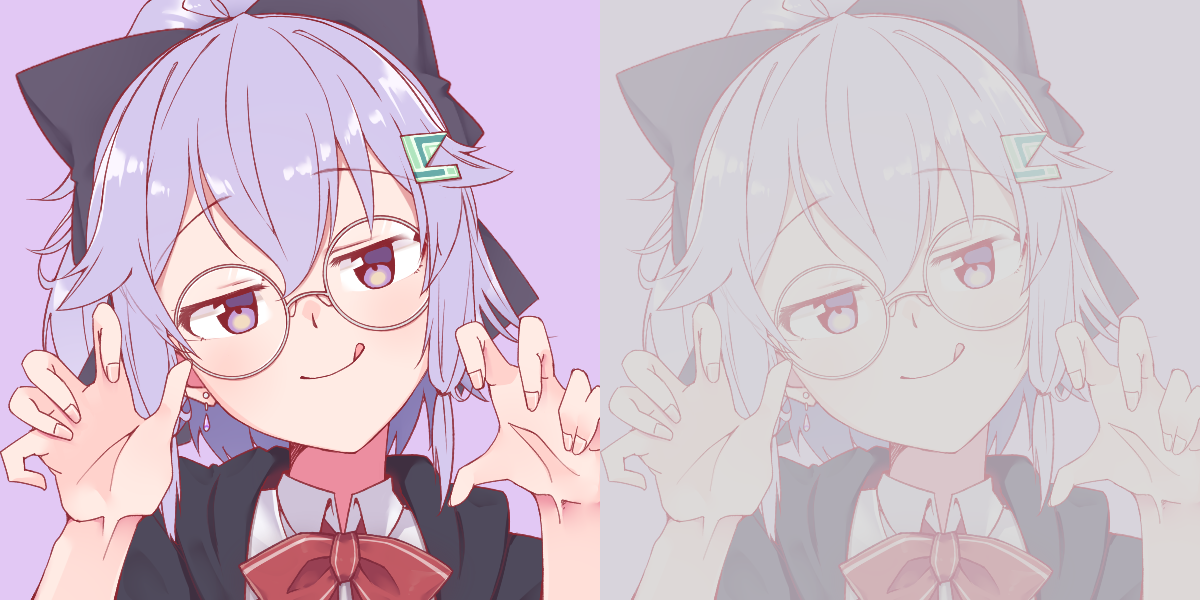

In [10]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------- ')

try:
	brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
	print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/01kitten.png')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
	for x in range(original.shape[1]):
		for c in range(original.shape[2]):
 			brightness_image[y,x,c] = np.clip(brightness*(np.log(1.0+original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

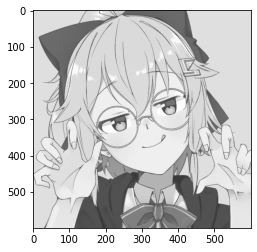

In [11]:
imgAvg = cv.imread('/content/drive/MyDrive/01kitten.png')
imgAvg[:] = imgAvg.mean(axis=-1, keepdims=1)
plt.imshow(imgAvg)

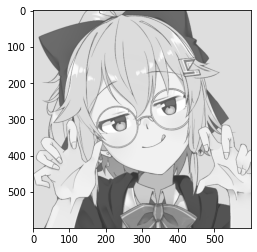

In [12]:
imgLight = cv.imread('/content/drive/MyDrive/01kitten.png')
imgLight[:] = np.max(imgLight,axis=-1,keepdims=1)/2+np.min(imgLight,axis=-1,keepdims=1)/2
plt.imshow(imgLight)

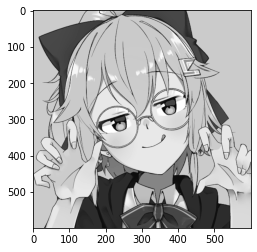

In [13]:
img = cv.imread('/content/drive/MyDrive/01kitten.png')
R, G, B = img[:,:,0], img[:,:,1],img[:,:,2]

gray_img = (0.21 * R) + (0.72 * G) + (0.07 * B)

plt.imshow(gray_img, cmap='gray')

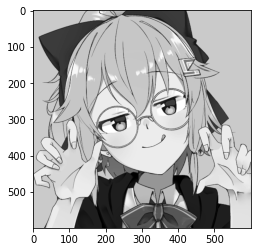

In [14]:
img = cv.imread('/content/drive/MyDrive/01kitten.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")

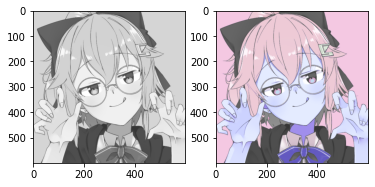

In [31]:
img = cv.imread('/content/drive/MyDrive/01kitten.png')
ret, mask = cv.threshold(img[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img, mask3)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img= cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(out, cmap='gray')